In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


Importing Data

In [2]:
store_sales_data = pd.read_csv("data/sales-data.csv")
store_sales_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Data Cleaning - Checking for Null Values

In [3]:
store_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


Dropping stores and Item columns, since we are only concerned with the price and the respective date which is needed to forecast

In [8]:
store_sales_data = store_sales_data.drop(['store', 'item'], axis=1)

KeyError: "['store', 'item'] not found in axis"

In [7]:
store_sales_data['date'] = pd.to_datetime(store_sales_data['date'])
store_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


Since we are forecasting sales in the future, we can aggregate the individual data of each month and forecast on the basis of each month

In [9]:
store_sales_data['date'] = store_sales_data['date'].dt.to_period("M")
monthly_sales_data = store_sales_data.groupby('date').sum().reset_index()

In [15]:
monthly_sales_data['date'] = monthly_sales_data['date'].dt.to_timestamp()

In [16]:
monthly_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   sales   60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


Visualization

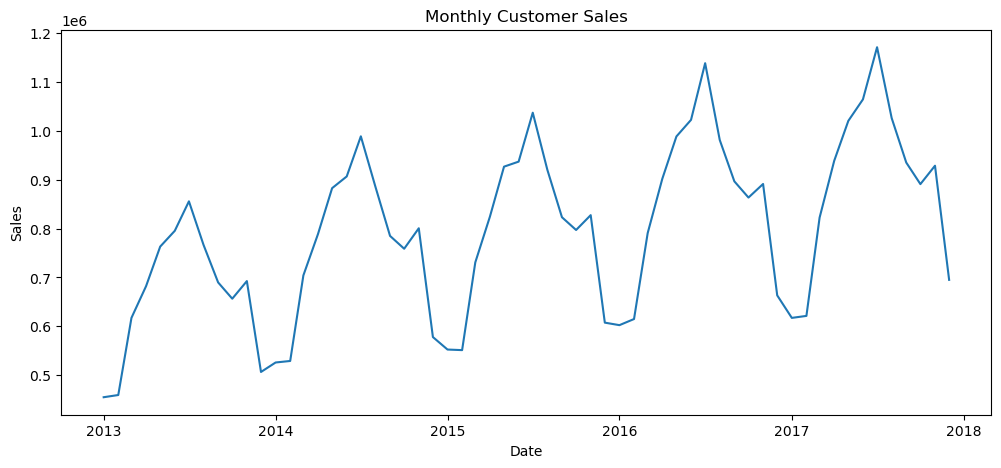

In [18]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales_data['date'], monthly_sales_data['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Customer Sales')
plt.show()